In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data_nD
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 20


In [2]:
# Load Forrester model

Reg_Data = BB_Model(dataset = 'Regression', Feature_Counts=[10,8])

#Reg_Data.df().head()

In [3]:
Reg_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.49755338894841084


MLPRegressor(random_state=RandomState(MT19937) at 0x1D9564E9840)

In [4]:
Reg_Data.Random_Forest()

0.8036804897747862


RandomForestRegressor(random_state=RandomState(MT19937) at 0x1D9564E9840)

In [5]:
Reg_Data.GP()

0.35012563243241546


GaussianProcessRegressor()

In [6]:
print(Reg_Data.get_features())

['Active_4', 'Active_2', 'Passive_0', 'Passive_1', 'Active_8', 'Active_3', 'Active_5', 'Active_9', 'Active_6', 'Active_7']


In [7]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Reg_Data.get_TT_data()

#Initializing the explainer object
URM_Exp = UR_Model(bbox_model           = Reg_Data.get_Random_Forest(),
                   train_data           = X_train,
                   feature_names        = Reg_Data.get_features(),
                   categorical_features = Reg_Data.get_catagorical(),
                   mode                 = Reg_Data.get_mode(),
                   sampling_optimize    = "opt")

#sur_GP = Surrogate_GP()


In [8]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [ 0.08904392 -0.02790297  0.04105526 -0.00353094  0.06191034 -0.02080328
 -0.05377914 -0.10800167 -0.11527761  0.01374088]
Std 0:  [0.9417969  1.03610127 0.97399027 1.01399942 1.01237969 1.06913914
 0.98418237 1.0628555  0.96288622 0.98881875]


In [9]:
# Generate explantion data for Random Forest

Reg_Stats = Feature_Statistics(feature_names = Reg_Data.get_features(), mode = Reg_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
#    data_row  = np.array([0.4])

#    print('data row ',data_row)
    
    URM_Exp.explain(X_init      = data_row.reshape(1, -1),
                    Dimension   = 'Multi D',
                    kernel_type = "Matern",
                    max_iter    = 20,
                    alpha       = "FUR_W",
                    #jitter=5,
                    interval    = 1,
                    normalize   = False)
       
    f_predict = Reg_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = URM_Exp.exp_predict(data_row.reshape(1, -1))
    e_predict = np.array(e_predict).ravel()
    
    acq_data = URM_Exp.get_acq_data()
    
#    X, y = URM_Exp.get_surrogate_data()

#    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(URM_Exp.get_surrogate_data())

    print(f_predict, e_predict, acq_data.get_fe_x0())
    
    scores = URM_Exp.permutation_importance()
    
    Reg_Stats.Add_Sample(sample_scores = scores,
                         outcome       = y_test[test_instance],
                         X_row         = data_row.reshape(1, -1),
                         f_prediction  = f_predict,
                         e_prediction  = e_predict.ravel(),
                         feopt         = acq_data.get_fe_x0(),
                         model         = URM_Exp.get_exp_model())


INSTANCE:  0


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[-89.96063263] [-8.99606326e+01  1.00000004e-05] [-89.96063263]
Active_4:	 1482.83890
Active_2:	 1939.37507
Passive_0:	 1753.28650
Passive_1:	 1806.61911
Active_8:	 2020.70853
Active_3:	 1945.46482
Active_5:	 1653.15494
Active_9:	 2346.58392
Active_6:	 1916.43732
Active_7:	 1883.17717
INSTANCE:  1


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[82.56759792] [8.25675980e+01 1.00000004e-05] [82.56759798]
Active_4:	 4359.01730
Active_2:	 4659.44410
Passive_0:	 3609.55932
Passive_1:	 4101.40344
Active_8:	 5534.43044
Active_3:	 4057.46510
Active_5:	 4882.61219
Active_9:	 5051.73241
Active_6:	 4821.93308
Active_7:	 3893.19099
INSTANCE:  2


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[-45.75807143] [-4.57580715e+01  1.00000004e-05] [-45.75807146]
Active_4:	 1030.66109
Active_2:	 1158.88784
Passive_0:	 1036.74757
Passive_1:	 1128.34835
Active_8:	 1120.65592
Active_3:	 1347.72073
Active_5:	 1177.47050
Active_9:	 1331.67188
Active_6:	 1266.15144
Active_7:	 1111.47807
INSTANCE:  3
[178.66652643] [1.78666526e+02 1.00000004e-05] [178.66652633]
Active_4:	 2502.60858
Active_2:	 3091.00784
Passive_0:	 2557.87724
Passive_1:	 2759.83716
Active_8:	 2854.38689
Active_3:	 3036.57051
Active_5:	 2502.74025
Active_9:	 3224.98534
Active_6:	 2722.76807
Active_7:	 2853.15540
INSTANCE:  4
[-19.55286846] [-1.95528685e+01  1.00000004e-05] [-19.55286846]
Active_4:	 834.21197
Active_2:	 1002.44168
Passive_0:	 869.90095
Passive_1:	 991.99277
Active_8:	 882.23977
Active_3:	 1094.25770
Active_5:	 1100.71702
Active_9:	 1028.45521
Active_6:	 1160.14144
Active_7:	 920.75082
INSTANCE:  5
[-151.79030524] [-1.51790305e+02  1.00000004e-05] [-151.7903052]
Active_4:	 1335.59849
Active_2:	 1611.12663
P

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[-23.86831165] [-2.38683116e+01  1.00000004e-05] [-23.86831163]
Active_4:	 2062.44360
Active_2:	 2659.03814
Passive_0:	 2008.38026
Passive_1:	 2582.81909
Active_8:	 2185.55662
Active_3:	 2548.83403
Active_5:	 2281.25963
Active_9:	 2473.63578
Active_6:	 2582.53255
Active_7:	 2623.56017
INSTANCE:  9


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[92.36393684] [9.23639367e+01 1.00000004e-05] [92.3639367]
Active_4:	 6329.75902
Active_2:	 7111.33263
Passive_0:	 6610.48375
Passive_1:	 6791.25558
Active_8:	 7121.71775
Active_3:	 7287.70227
Active_5:	 6775.56751
Active_9:	 7127.17925
Active_6:	 6446.75863
Active_7:	 6766.90531
INSTANCE:  10
[21.0906014] [2.10906014e+01 1.00000004e-05] [21.0906014]
Active_4:	 1632.82345
Active_2:	 1797.54613
Passive_0:	 1616.81863
Passive_1:	 1640.18858
Active_8:	 1686.49531
Active_3:	 1996.25062
Active_5:	 1899.75740
Active_9:	 1895.91969
Active_6:	 1483.03252
Active_7:	 1683.62620
INSTANCE:  11


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[159.70490845] [1.59704908e+02 1.00000004e-05] [159.70490847]
Active_4:	 1657.40541
Active_2:	 2096.43164
Passive_0:	 1682.32237
Passive_1:	 2003.85960
Active_8:	 2155.30864
Active_3:	 2246.41293
Active_5:	 1846.93709
Active_9:	 2346.34366
Active_6:	 1809.02132
Active_7:	 1784.24769
INSTANCE:  12


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[65.89557623] [6.58955762e+01 1.00000004e-05] [65.89557622]
Active_4:	 2407.97873
Active_2:	 2950.90415
Passive_0:	 2705.56781
Passive_1:	 2878.65710
Active_8:	 2819.64238
Active_3:	 3109.51607
Active_5:	 2726.15397
Active_9:	 3138.43203
Active_6:	 2626.76697
Active_7:	 2748.52229
INSTANCE:  13
[78.02407228] [7.80240723e+01 1.00000004e-05] [78.02407232]
Active_4:	 1636.27295
Active_2:	 2045.41395
Passive_0:	 1656.07802
Passive_1:	 1879.73873
Active_8:	 1974.17690
Active_3:	 2068.95244
Active_5:	 1691.11257
Active_9:	 2046.89106
Active_6:	 1775.96995
Active_7:	 1870.93869
INSTANCE:  14


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[31.89981914] [3.18998191e+01 1.00000004e-05] [31.89981908]
Active_4:	 3036.28291
Active_2:	 3152.50249
Passive_0:	 3301.47759
Passive_1:	 3472.13540
Active_8:	 3740.32541
Active_3:	 3429.18443
Active_5:	 3424.82033
Active_9:	 3997.13049
Active_6:	 3294.10073
Active_7:	 3311.75668
INSTANCE:  15
[-113.516134] [-1.13516134e+02  1.00000004e-05] [-113.51613406]
Active_4:	 2792.59165
Active_2:	 3191.69484
Passive_0:	 2868.06291
Passive_1:	 3173.98306
Active_8:	 3052.14956
Active_3:	 3315.80774
Active_5:	 2874.27119
Active_9:	 3283.47801
Active_6:	 2904.42730
Active_7:	 2898.55137
INSTANCE:  16
[-41.84244436] [-4.18424443e+01  1.00000004e-05] [-41.84244432]
Active_4:	 5593.94604
Active_2:	 5738.03223
Passive_0:	 5757.13338
Passive_1:	 5509.87962
Active_8:	 6451.58449
Active_3:	 5770.32766
Active_5:	 5889.26597
Active_9:	 6997.25280
Active_6:	 5664.00582
Active_7:	 6103.59792
INSTANCE:  17


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[-42.95189941] [-4.29518995e+01  1.00000004e-05] [-42.95189948]
Active_4:	 1116.77451
Active_2:	 1989.21662
Passive_0:	 1787.34976
Passive_1:	 1930.48192
Active_8:	 1982.61112
Active_3:	 2100.20645
Active_5:	 2222.31919
Active_9:	 2304.09640
Active_6:	 2016.56102
Active_7:	 1711.51366
INSTANCE:  18
[-28.60228379] [-2.86022839e+01  1.00000004e-05] [-28.6022839]
Active_4:	 4754.77882
Active_2:	 4926.09116
Passive_0:	 4650.20499
Passive_1:	 5411.75658
Active_8:	 5397.01110
Active_3:	 5911.87188
Active_5:	 4788.24107
Active_9:	 6442.36345
Active_6:	 4946.59775
Active_7:	 5287.42716
INSTANCE:  19


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

[-13.44251855] [-1.34425186e+01  1.00000004e-05] [-13.44251861]
Active_4:	 2608.46085
Active_2:	 2954.57350
Passive_0:	 2984.81768
Passive_1:	 2906.75526
Active_8:	 2934.63262
Active_3:	 3038.14649
Active_5:	 3005.34542
Active_9:	 3073.43826
Active_6:	 3256.63737
Active_7:	 3058.55618


In [10]:
import matplotlib.pyplot as plt


In [11]:
print(f_predict)
print(e_predict)


[-13.44251855]
[-1.34425186e+01  1.00000004e-05]


In [12]:
Reg_Stats.Feature_Counts(max_features=6, scaled=True, threshold=0.05)


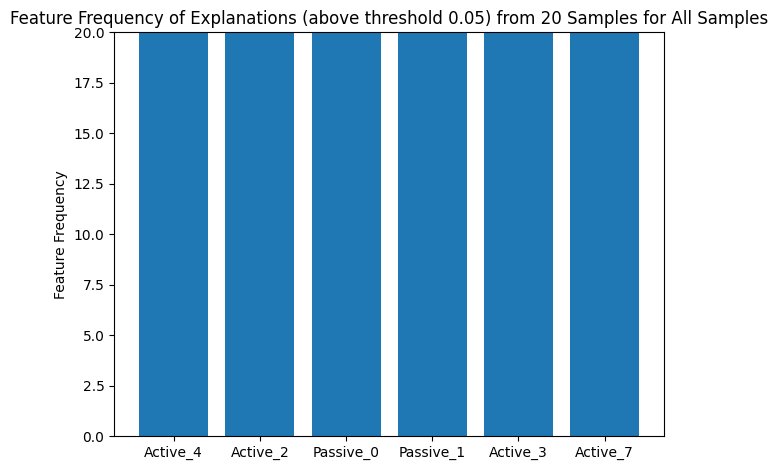

In [13]:
Reg_Stats.Frequency_Plot()


In [14]:
Reg_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           63.79773423712406  :  1898.5404431681563  :  168.78290009384125
y - exp(x):          63.797734232411855  :  1898.5404443995012  :  168.78290013159875
BB(x) - exp(x):      7.04980226196028e-08  :  8.54549709512922e-15  :  4.3326332388460287e-07
Average exp(x) var:  1.0000000413701844e-05


In [15]:
Reg_Stats.Jaccard_Values()

Mean Jaccard Similarity:  0.5882205513784461
Mean Jaccard Distance:    0.4117794486215539


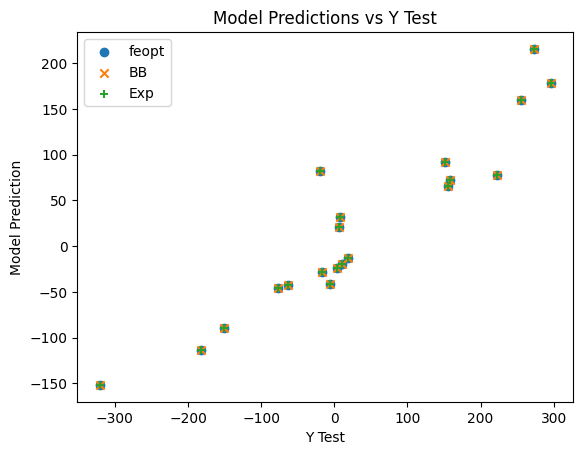

In [16]:
Reg_Stats.Reg_Fidelity_Graph()

top_features True
top_features (20, 6)


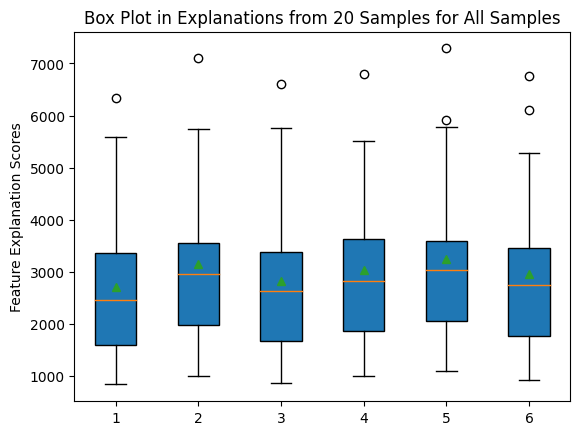

1 -      Active_4
2 -      Active_2
3 -      Passive_0
4 -      Passive_1
5 -      Active_3
6 -      Active_7


In [17]:
Reg_Stats.Box_Plot()


In [18]:
acq_data.Create_BB_plot()

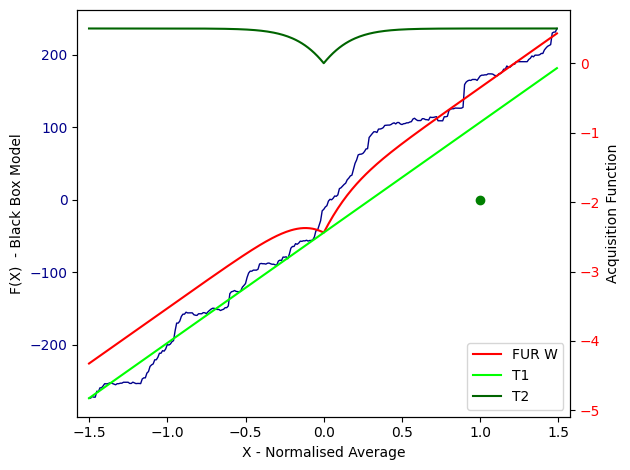

In [19]:
acq_data.plot_point(0)

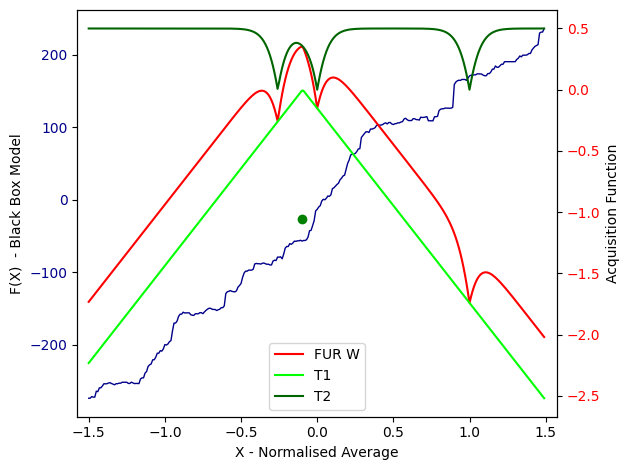

In [20]:
acq_data.plot_point(5)

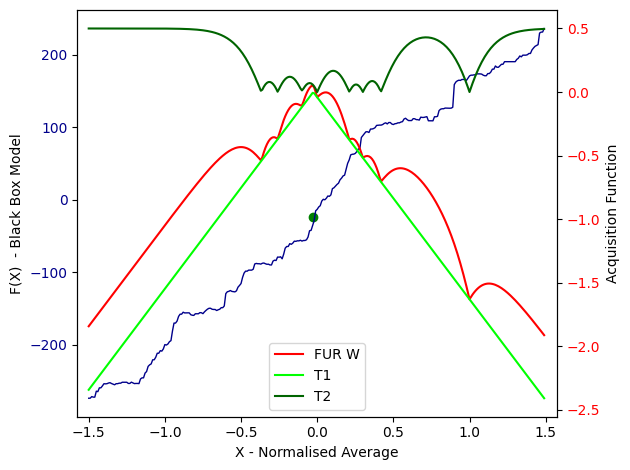

In [21]:
acq_data.plot_point(10)

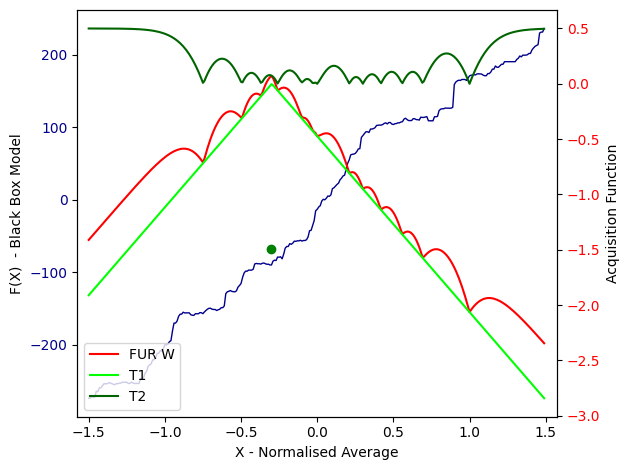

In [22]:
acq_data.plot_point(15)

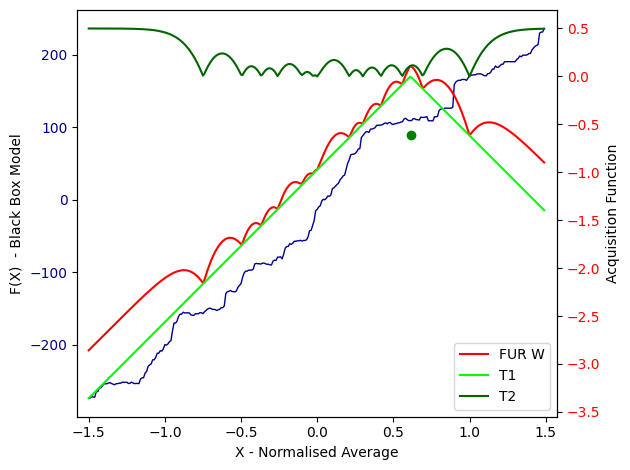

In [23]:
acq_data.plot_point(19)

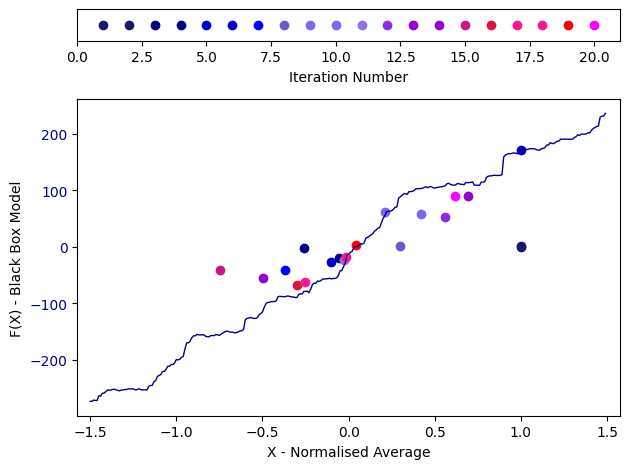

In [24]:
acq_data.plot_all()